# Dropout
Dropout [1] is a technique for regularizing neural networks by randomly setting some features to zero during the forward pass. In this exercise you will implement a dropout layer and modify your fully-connected network to optionally use dropout.

[1] Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012

In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
    print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [3]:
x = np.random.randn(500, 500) + 10

for p in [0.3, 0.6, 0.75]:
    out, _ = dropout_forward(x, {'mode': 'train', 'p': p})
    out_test, _ = dropout_forward(x, {'mode': 'test', 'p': p})

    print 'Running tests with p = ', p
    print 'Mean of input: ', x.mean()
    print 'Mean of train-time output: ', out.mean()
    print 'Mean of test-time output: ', out_test.mean()
    print 'Fraction of train-time output set to zero: ', (out == 0).mean()
    print 'Fraction of test-time output set to zero: ', (out_test == 0).mean()
    print

Running tests with p =  0.3
Mean of input:  10.0005950952
Mean of train-time output:  5.469923113
Mean of test-time output:  10.0005950952
Fraction of train-time output set to zero:  0.617216
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.6
Mean of input:  10.0005950952
Mean of train-time output:  6.89774428777
Mean of test-time output:  10.0005950952
Fraction of train-time output set to zero:  0.724196
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.75
Mean of input:  10.0005950952
Mean of train-time output:  9.08835864027
Mean of test-time output:  10.0005950952
Fraction of train-time output set to zero:  0.772864
Fraction of test-time output set to zero:  0.0



In [4]:
x = np.random.randn(10, 10) + 10
dout = np.random.randn(*x.shape)

dropout_param = {'mode': 'train', 'p': 0.8, 'seed': 123}
out, cache = dropout_forward(x, dropout_param)
dx = dropout_backward(dout, cache)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_forward(xx, dropout_param)[0], x, dout)

print 'dx relative error: ', rel_error(dx, dx_num)

dx relative error:  1.89290739425e-11


# Regularization experiment
As an experiment, we will train a pair of two-layer networks on 500 training examples: one will use no dropout, and one will use a dropout probability of 0.75. We will then visualize the training and validation accuracies of the two networks over time.

In [5]:
# Train two identical nets, one with dropout and one without

num_train = 500
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}
dropout_choices = [0, 0.25, 0.5, 0.75, 0.8, 0.9, 0.99]
for dropout in dropout_choices:
    model = FullyConnectedNet([500], dropout=dropout)
    print dropout

    solver = Solver(model, small_data,
                  num_epochs=25, batch_size=100,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': 5e-4,
                  },
                  verbose=True, print_every=100)
    solver.train()
    solvers[dropout] = solver

0
(Iteration 1 / 125) loss: 8.819272
(Epoch 0 / 25) train acc: 0.166000; val_acc: 0.145000


cs231n/layers.py:560: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


(Epoch 1 / 25) train acc: 0.384000; val_acc: 0.225000
(Epoch 2 / 25) train acc: 0.480000; val_acc: 0.229000
(Epoch 3 / 25) train acc: 0.582000; val_acc: 0.243000
(Epoch 4 / 25) train acc: 0.674000; val_acc: 0.269000
(Epoch 5 / 25) train acc: 0.676000; val_acc: 0.256000
(Epoch 6 / 25) train acc: 0.804000; val_acc: 0.294000
(Epoch 7 / 25) train acc: 0.854000; val_acc: 0.254000
(Epoch 8 / 25) train acc: 0.854000; val_acc: 0.249000
(Epoch 9 / 25) train acc: 0.926000; val_acc: 0.252000
(Epoch 10 / 25) train acc: 0.950000; val_acc: 0.267000
(Epoch 11 / 25) train acc: 0.966000; val_acc: 0.271000
(Epoch 12 / 25) train acc: 0.972000; val_acc: 0.267000
(Epoch 13 / 25) train acc: 0.978000; val_acc: 0.276000
(Epoch 14 / 25) train acc: 0.988000; val_acc: 0.286000
(Epoch 15 / 25) train acc: 0.988000; val_acc: 0.304000
(Epoch 16 / 25) train acc: 0.974000; val_acc: 0.301000
(Epoch 17 / 25) train acc: 0.992000; val_acc: 0.296000
(Epoch 18 / 25) train acc: 0.992000; val_acc: 0.287000
(Epoch 19 / 25) tra

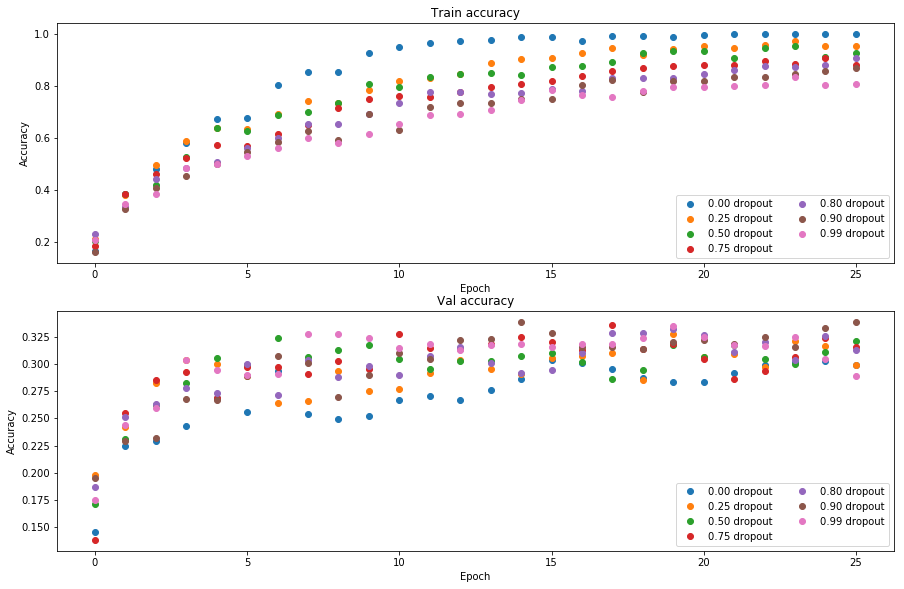

In [6]:
# Plot train and validation accuracies of the two models

train_accs = []
val_accs = []
for dropout in dropout_choices:
    solver = solvers[dropout]
    train_accs.append(solver.train_acc_history[-1])
    val_accs.append(solver.val_acc_history[-1])

plt.subplot(3, 1, 1)
for dropout in dropout_choices:
    plt.plot(solvers[dropout].train_acc_history, 'o', label='%.2f dropout' % dropout)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for dropout in dropout_choices:
    plt.plot(solvers[dropout].val_acc_history, 'o', label='%.2f dropout' % dropout)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

# Question
Explain what you see in this experiment. What does it suggest about dropout?

# Answer
Dropout prevent overfitting. Without dropout, the gap accuracy between training and validation could be 65%. If using dropout, the larger p we use the gap accuracy between training and validation would be smaller. However, since dropout reduces the capacity of neural network if we use a too large p, the network would be to weak to fit to data.